In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,TargetEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [332]:
data = pd.read_excel('dataset2.xlsx')

In [333]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [334]:
data1 = data.copy()

# Exploratory Data Analysis

In [336]:
print(f"No: of rows in dataset:\n{data.shape[0]}\nNo: of Columns in dataset:{data.shape[1]}")

No: of rows in dataset:
32561
No: of Columns in dataset:15


In [337]:
print("Statistical Summary :\n")
print(data.describe())

Statistical Summary :

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


Text(0.5, 0.98, 'Feature Distributions')

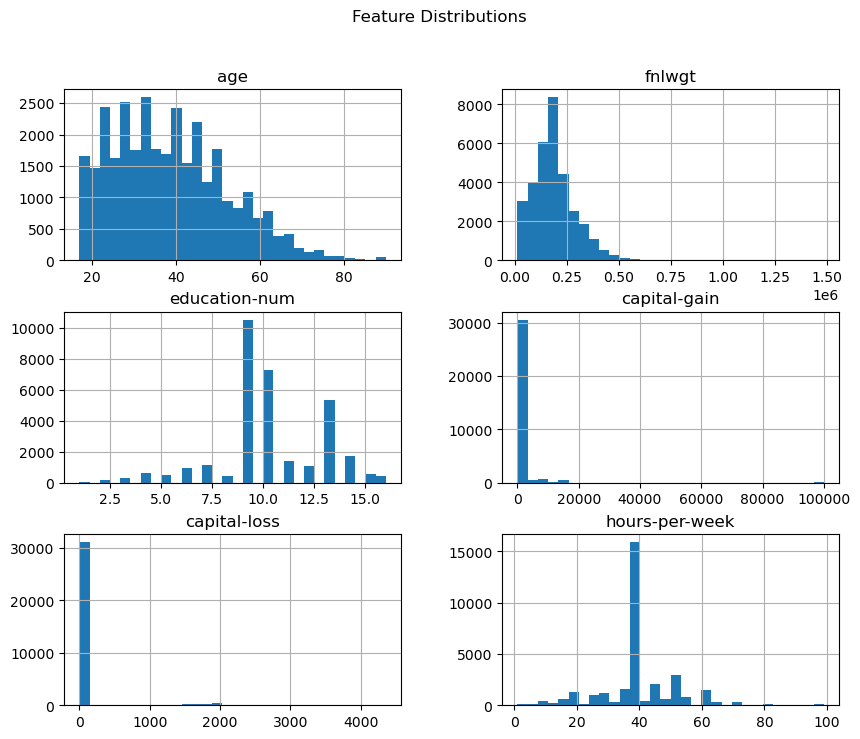

In [338]:
data.hist(figsize=(10,8),bins=30)
plt.suptitle('Feature Distributions')

<Axes: >

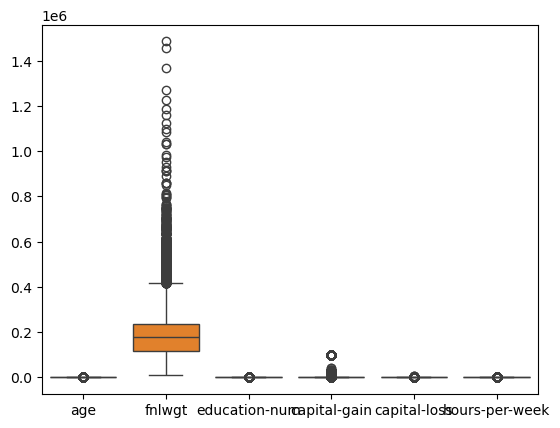

In [339]:
sns.boxplot(data)

# Data Preprocessing

**Handle Missing Values**

In [343]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

**Outliers Removal**

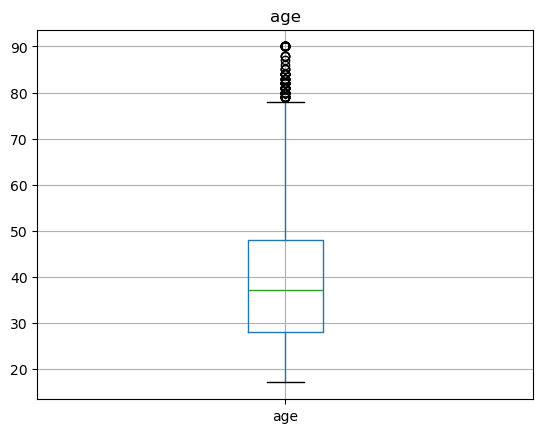

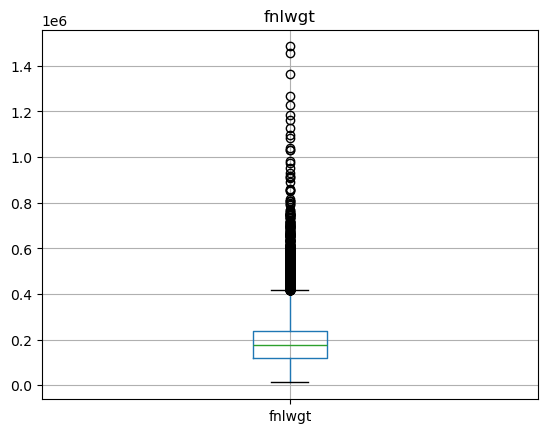

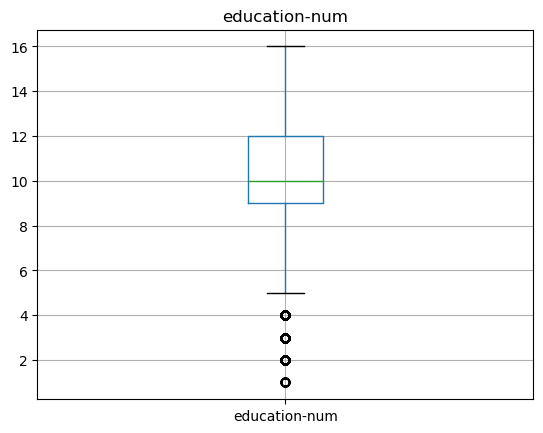

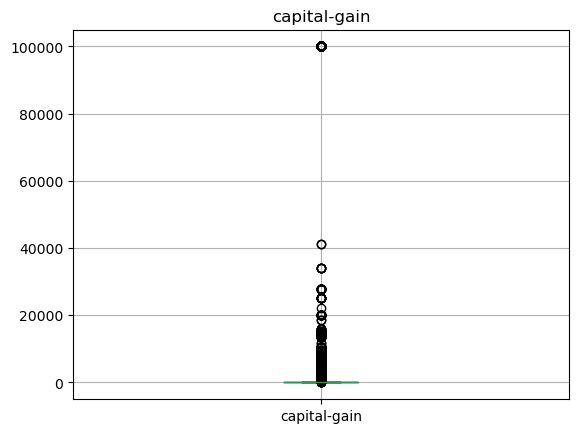

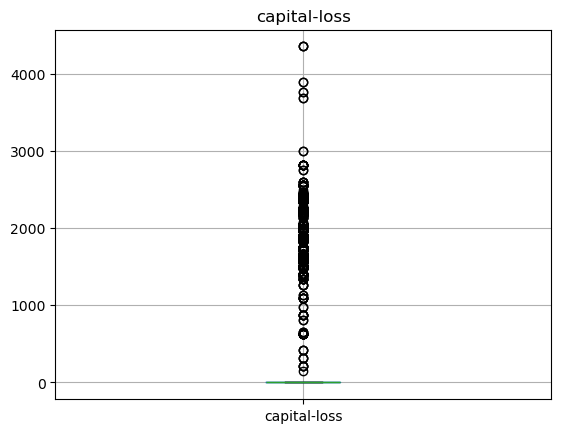

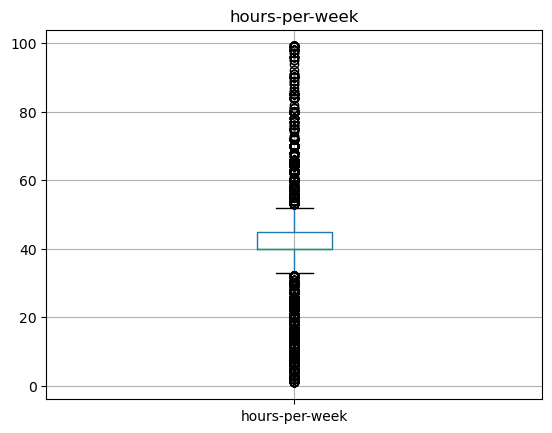

In [345]:
for column in data.select_dtypes(include=['number']):
  # print(column)
  plt.figure()
  data.boxplot(column)
  plt.title(column)


In [355]:
outlier_cols = []
for column in data.select_dtypes(include=['number']):
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)

  iqr=q3-q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  if ((data[column] < lower_bound) | (data[column] > upper_bound)).any():
        outlier_cols.append(column)

In [361]:
outlier_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [359]:
for column in outlier_cols:
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)

  iqr=q3-q1

  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  data[column]=data[column].clip(lower_bound,upper_bound)

**Encoding And Scaling**

In [460]:
le = LabelEncoder()
data['education'] = le.fit_transform(data['education'])
data['sex'] = le.fit_transform(data['sex'])
data['native-country']=le.fit_transform(data['native-country'])
data['occupation'] = le.fit_transform(data['occupation'])
data['occupation'] = le.fit_transform(data['occupation'])
data['workclass'] = le.fit_transform(data['workclass'])
data['salary']=le.fit_transform(data['salary'])

In [398]:
data.drop('relationship',axis=1,inplace=True)

In [400]:
data.drop('marital-status',axis=1,inplace=True)

In [402]:
data.drop('race',axis=1,inplace=True)

In [462]:
data

,age,workclass,fnlwgt,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,0.739130,1,1,0,0,0.375,39,0
1,50,6,83311,9,0.739130,4,1,0,0,0.000,39,0
2,38,4,215646,11,0.391304,6,1,0,0,0.375,39,0
3,53,4,234721,1,0.217391,6,1,0,0,0.375,39,0
4,28,4,338409,9,0.739130,10,0,0,0,0.375,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,0.652174,13,0,0,0,0.275,39,0
32557,40,4,154374,11,0.391304,7,1,0,0,0.375,39,1
32558,58,4,151910,11,0.391304,1,0,0,0,0.375,39,0
32559,22,4,201490,11,0.391304,1,1,0,0,0.000,39,0


In [450]:
# Scaling
min_max = MinMaxScaler()
data['hours-per-week'] = min_max.fit_transform(data[['hours-per-week']])
data['education-num'] = min_max.fit_transform(data[['education-num']])
data['native-country']= min_max.fit_transform(data[['native-country']])
data['workclass']= min_max.fit_transform(data[['workclass']])

In [464]:
data

,age,workclass,fnlwgt,education,education-num,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,77516,9,0.739130,1,1,0,0,0.375,39,0
1,50,6,83311,9,0.739130,4,1,0,0,0.000,39,0
2,38,4,215646,11,0.391304,6,1,0,0,0.375,39,0
3,53,4,234721,1,0.217391,6,1,0,0,0.375,39,0
4,28,4,338409,9,0.739130,10,0,0,0,0.375,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,0.652174,13,0,0,0,0.275,39,0
32557,40,4,154374,11,0.391304,7,1,0,0,0.375,39,1
32558,58,4,151910,11,0.391304,1,0,0,0,0.375,39,0
32559,22,4,201490,11,0.391304,1,1,0,0,0.000,39,0


In [458]:
data['salary'].dtypes

dtype('O')

**Train Test Split**

In [502]:
X = data.drop('salary',axis=1)
y = data['salary']

X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42 , stratify= y)

**Model Selection**

In [506]:
from sklearn.linear_model import LogisticRegression

# Initializing the model
log_reg = LogisticRegression(random_state=42)

# Training the model
log_reg.fit(X_train, y_train)

# Making predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.751561060497492

Confusion Matrix:
[[7284  133]
 [2294   58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      7417
           1       0.30      0.02      0.05      2352

    accuracy                           0.75      9769
   macro avg       0.53      0.50      0.45      9769
weighted avg       0.65      0.75      0.66      9769



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [508]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initializing the model
decision_tree = DecisionTreeClassifier(random_state=42)

# Training the model
decision_tree.fit(X_train, y_train)

# Making predictions
y_pred_tree = decision_tree.predict(X_test)

# Evaluating the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.7418364213327874

Confusion Matrix:
[[6117 1300]
 [1222 1130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      7417
           1       0.47      0.48      0.47      2352

    accuracy                           0.74      9769
   macro avg       0.65      0.65      0.65      9769
weighted avg       0.74      0.74      0.74      9769



In [510]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train,y_train)

# make predictions
y_pred_rf = rf_classifier.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test,y_pred_rf)
report = classification_report(y_test,y_pred_rf)


print('Accuracy Score',accuracy)
print('classification report',report)
print(f"Confusion Matrix: \n{confusion_matrix(y_test,y_pred_rf)}")


Accuracy Score 0.7969085883918517
classification report               precision    recall  f1-score   support

           0       0.84      0.91      0.87      7417
           1       0.61      0.44      0.51      2352

    accuracy                           0.80      9769
   macro avg       0.72      0.68      0.69      9769
weighted avg       0.78      0.80      0.79      9769

Confusion Matrix: 
[[6742  675]
 [1309 1043]]


**Hyper Parameter Tuning**

In [513]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Decision Tree
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Setting up GridSearchCV
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_param_grid, cv=5, n_jobs=-1, verbose=1)

# Fitting the grid search
tree_grid.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for Decision Tree:", tree_grid.best_params_)
print("Best Accuracy for Decision Tree:", tree_grid.best_score_)

# Predicting using the best model
y_pred_tree_tuned = tree_grid.best_estimator_.predict(X_test)

# Evaluating the tuned model
print("\nTuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree_tuned))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree_tuned))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Accuracy for Decision Tree: 0.8058528323638559

Tuned Decision Tree Accuracy: 0.8024362780223155

Confusion Matrix:
[[6786  631]
 [1299 1053]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      7417
           1       0.63      0.45      0.52      2352

    accuracy                           0.80      9769
   macro avg       0.73      0.68      0.70      9769
weighted avg       0.79      0.80      0.79      9769

